[Benjamin Chan](https://www.linkedin.com/in/benjamin-chan-chun-ho) - [Data Science Proof of Concept](https://github.com/BenjaminChanChunHo/Data_Science_Proof_of_Concept)

The theories are summarized from [Reference](#Reference) at the end. The simulation study and Python coding are done by me. The core program is in [Class Definition](#Class-Definition). Important terminologies are highlighted in the first mention.

# Introduction

For the sake of discussion, there is a binary classifier that generates a score (or prediction) per instance. In other words, a classifier is a mapping from instances to predicted classes. A label is the actual class of an instance.

In general, a training/validation/testing data split is done, and then a classifier is built and evaluated. However, they are outside the scope of this study. My focus is the meaning and interpretation of a `receiver operating characteristic (ROC) curve` and its `area under the curve (AUC)`.

Let $X$ be a continuous random variable (so-called score) that has a distribution. If an instance belongs to positive class, $X\sim f_1$. If it belongs to negative class, $X\sim f_0$. In other words, $f_1$ is the score distribution of a classifier under positive class while $f_0$ is that distribution under negative class. Let $X_1\sim f_1$ and $X_0\sim f_0$. Here $X_1$ is the score of a positive instance and $X_0$ is the score of a negative instance. A subscript 1 denotes positive class, and 0 denotes negative class. 

Without loss of generality, assume that the simulated data are testing scores. See my simulation below and the simulated distributions [here](#Score-Distribution-and-Threshold).

# Simulation: Scores and Labels

It is important to emphasize that no assumptions about the distribution form of $f_1$ and $f_0$ are needed. For simulation purpose, the beta distribution is a convenient tool to generate scores on the interval $[0,1]$ to imitate the case of probability scores. The probability density function of the beta distribution $X\sim Beta(\alpha, \beta)$, for $0\leq x \leq 1$ and two parameters $\alpha, \beta > 0$, is
$$f(x|\alpha,\beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1},$$
where $\Gamma(\cdot)$ is the gamma function.

For illustration, different parameters are chosen for two beta distributions to pretend that there are two classifiers for comparison. Moreover, different parameters are chosen for positive and negative classes in a way that the classifier 1 has better discrimination power (much higher average score in positive instances than that in negative ones). See the data visualization [here](#Simulation:-Score-Distribution-and-Threshold).

To be specific, the classifer 1 is given by
$$X_1^{(1)} \sim Beta(\alpha_1^{(1)}, \beta_1^{(1)});  \quad X_0^{(1)}\sim Beta(\alpha_0^{(1)}, \beta_0^{(1)})$$
while the classifer 2 is given by
$$X_1^{(2)} \sim Beta(\alpha_1^{(2)}, \beta_1^{(2)});  \quad X_0^{(2)}\sim Beta(\alpha_0^{(2)}, \beta_0^{(2)})$$
where the superscript 1 denotes the classifer 1, and 2 denotes the classifer 2. In this simulation, the parameters are set to be
$$\begin{align*}
\alpha_1^{(1)}=13, \quad \beta_1^{(1)} &= 8, \quad \alpha_0^{(1)} = 6, \quad \beta_0^{(1)} = 9; \\
\alpha_1^{(2)}=9, \quad \beta_1^{(2)} &= 8, \quad \alpha_0^{(2)} = 6, \quad \beta_0^{(2)} = 7. 
\end{align*}$$ 

In [1]:
import numpy as np
from scipy.stats import beta

n1 = 10000                                              # Number of observations in positive class
n0 = 30000                                              # Number of observations in negative class

a11, b11 = (13, 8)                                      # Beta parameters of positive class for classifier 1
a10, b10 = (6, 9)                                       # Beta parameters of negative class for classifier 1
a21, b21 = (9, 8)                                       # Similarly for classifier 2
a20, b20 = (6, 7)                                       # Similarly for classifier 2

np.random.seed(seed = 1)                                # For reproducibility

Score11 = np.random.beta(a11, b11, n1)                  # Simulate scores in positive class for classifier 1
Score10 = np.random.beta(a10, b10, n0)                  # Simulate scores in negative class for classifier 1
Score21 = np.random.beta(a21, b21, n1)                  # Similarly for classifier 2
Score20 = np.random.beta(a20, b20, n0)                  # Similarly for classifier 2

Score1 = np.append(Score11, Score10)                    # Concatenate scores for classifier 1
Score2 = np.append(Score21, Score20)                    # Similarly for classifier 2

Label = np.append(np.ones(n1), np.zeros(n0))
Label = Label.astype(int)                               # Labels

print(f'The scores of classifier 1 are {Score1}.')
print(f'The scores of classifier 2 are {Score2}.')
print(f'The labels are {Label}.')

The scores of classifier 1 are [0.76068495 0.68239897 0.77634871 ... 0.62175101 0.29452154 0.42447925].
The scores of classifier 2 are [0.51288236 0.64044733 0.36446533 ... 0.45363702 0.5806036  0.55108973].
The labels are [1 1 1 ... 0 0 0].


# Concept of TPR & FPR

Given a `decision threshold` $T$, the instance is classified as positive if $X\ge T$, and negative if $X<T$. Note that the `true positive rate (TPR)` and the `false positive rate (FPR)` are defined by
$$TPR = \frac{TP}{P} = \frac{TP}{TP + FN}$$
and
$$FPR = \frac{FP}{N} = \frac{FP}{FP + TN},$$

where P, N, TP, FP, TN and FN stand for positive, negative, true positive, false positive, true negative and false negative respectively.

Intuitively, 
>TPR is the probability that a positive instance is correctly classified while FPR is the probability that a negative instance is incorrectly classified. 

They are functions that depend on the parameter $T$, i.e.
$$TPR(T) \triangleq \int_T^\infty f_1(x) dx = \mathbb{P}(X>T|X\sim f_1)$$
and
$$FPR(T) \triangleq \int_T^\infty f_0(x) dx = \mathbb{P}(X>T|X\sim f_0).$$

# Simulation: Score Distribution and Threshold

In the legend, "Positive" means positive class and "Negative" means negative class. The number 1 refers to the classifier 1 and the number 2 refers to the classifier 2. As mentioned [before](#Simulation:-Scores-and-Labels), the classifier 1 is designed to have better discrimination power. The vertical line represents the case of $T=0.5$.

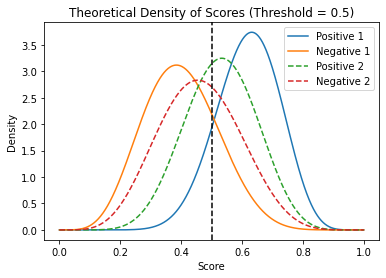

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(0.001, 0.999, 10000)                    # x values in x-axis

plt.plot(x, beta.pdf(x, a11, b11), label = 'Positive 1')
plt.plot(x, beta.pdf(x, a10, b10), label = 'Negative 1')

plt.plot(x, beta.pdf(x, a21, b21), label = 'Positive 2', linestyle = '--')
plt.plot(x, beta.pdf(x, a20, b20), label = 'Negative 2', linestyle = '--')

Threshold = 0.5                                         # Set a decision threshold 
plt.title(f'Theoretical Density of Scores (Threshold = {Threshold})') 
plt.xlabel('Score')
plt.ylabel('Density')
plt.axvline(x = Threshold, color = 'k', linestyle = '--')
plt.legend(loc = 'best')
plt.show()

# Concept of ROC Curve & AUC

A ROC curve is a plot of TPR against FPR as a threshold varies. It is commonly used to gauge the performance of a classifier. An example is shown in my plot [here](#Simulation:-ROC-Curve). The AUC is a single value that measures the classification capability.

Interestingly, there is a probabilistic interpretation of AUC. To be specific,
> AUC is interpreted as probability that a classifier ranks a randomly chosen positive instance higher than a randomly chosen negative instance.

Statistically,
$$\displaystyle AUC = \mathbb{P}(X_1 > X_0).$$

Background: <br/>
Note that $FPR(T): T \rightarrow x$ and $TPR(T): T \rightarrow y(x)$, where $y(x)$ is a value in y-axis of ROC curve as a function of the value in x-axis. When $x$ increases from 0 to 1, the corresponding $T$ decreases from $\infty$ to $-\infty$. Intuitively, if the threshold $T$ is very large, then there is no predicted positive (and false positive), and hence FPR is 0. Alternatively, $FPR(T)\rightarrow 0$ as $T\rightarrow \infty$ while $FPR(T)\rightarrow 1$ as $T\rightarrow -\infty$. 

Proof:
$$\begin{align*}
AUC & = \int_0^1 TPR(FPR^{-1}(x))dx \\
& = \int_\infty ^{-\infty} TPR(T) FPR'(T) dT \\
& = \int_{-\infty}^{\infty} \int_T^\infty f_1(T') f_0(T) dT' dT \\
& = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \mathbb{1} (T'>T) f_1(T') f_0(T) dT' dT \\
& = \mathbb{P}(X_1 > X_0)
\end{align*}$$

where $\mathbb{1}(\cdot)$ is the indicator function, i.e. $\mathbb{1}(T'>T) = 1$ if $T'>T$, 0 otherwise. The fact that $FPR'(T) = -f_0(T)$ has been used.

# Concept of Mann–Whitney Statistics

From the probabilistic interpretation, AUC is closely related to Mann–Whitney statistics which can be regarded as non-parametric estimator of $\mathbb{P}(X_1 > X_0)$, or at most up to a scaling constant. For simplicity, the technicality is skipped but can be found in [Reference](#Reference). However, the formula of Mann–Whitney statistics is insightful.

Notation: <br/>
Denote the set of positive instances by $\mathcal{D}_1$ and the set of negative instances by $\mathcal{D}_0$. The dataset is then $\mathcal{D} = \mathcal{D}_1 \cup \mathcal{D}_0$. Consider a score function of an instance, i.e. $X(d)$ for $d\in \mathcal{D}$. To be consistent in notation, let $X_1 = X(d_1)\sim f_1$ for $d_1 \in \mathcal{D}_1$ and $X_0 = X(d_0)\sim f_0$ for $d_0 \in \mathcal{D}_0$. For a finite dataset, the number of positive instances is $|\mathcal{D}_1|$ and the number of negative instances is $|\mathcal{D}_0|$.

The Mann–Whitney statistics is given by
$$U = \frac{1}{|\mathcal{D}_1|\cdot |\mathcal{D}_0|} \sum_{d_0 \in \mathcal{D}_0} \sum_{d_1 \in \mathcal{D}_1} \mathbb{1}[X(d_1) > X(d_0)].$$
Assume there is no tie in continuous scores. Sometimes $U_1 = |\mathcal{D}_1|\cdot |\mathcal{D}_0| \cdot U$, without a scaling constant, is called the Mann–Whitney statistics instead.

Intuitive interpretation: <br/>
> By making all $|\mathcal{D}_1|\cdot |\mathcal{D}_0|$ possible score comparisons of positive and negative classes, and normalizing by $|\mathcal{D}_1|\cdot |\mathcal{D}_0|$, the sample statistics $U$ is an unbiased estimator of $\mathbb{P}(X_1 > X_0)$, even if not all comparisons are independent. 

# Efficient Computation and Usage of Statistics

According to [Mason and Graham [6]](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.458.8392), the Mann–Whitney statistics can be more efficiently computed by 

$$U = \frac{U_1}{n_1\cdot n_0} = \frac{1}{n_1\cdot n_0} \Big[\sum_{i=1}^{n_1} r_{1i} - \frac{n_1(n_1 + 1)}{2}\Big],$$

where $n_1 = |\mathcal{D}_1|$, $n_0 = |\mathcal{D}_0|$ and $r_{1i}$ is the rank of the $i$th positive instance in the dataset $\mathcal{D}$. See my numerical investigation [here](#Relationship-among-AUC,-Mann–Whitney-Statistics-and-Probability).

According to [Hanley and Mcneil [5]](https://www.researchgate.net/publication/16134792_The_Meaning_and_Use_of_the_Area_Under_a_Receiver_Operating_Characteristic_ROC_Curve), the advantages of establishing a connection to Mann–Whitney statistics include 
* estimating the standard error of AUC,
* planning the sample size required to reliably estimate AUC and
* planning the sample size required to detect statistical differences in AUC of classifiers.

# Class Definition

In [3]:
import numbers                                                   # Numeric abstract base classes
from sklearn import metrics

class ROC:                                                       # Class name
    def __init__(self, Label, Score): 
        self.Label = Label                                       # Set Label
        self.Score = Score                                       # Set Score
        
        if len(Label) != len(Score):
            raise Exception('Length of scores should match to that of labels!')
        
    def Make_Prediction(self, Threshold):  
        '''
        Threshold is used to make prediction. 
        Predict 1 if a score is greater than or equal to Threshold, 0 otherwise.
        '''
        
        if isinstance(Threshold, numbers.Real):                  # Threshold should be a real number
            self.Threshold = Threshold                           # Set Threshold
        else:
            raise Exception('Threshold should be a real number!')
            
        self.Prediction = (self.Score >= Threshold).astype(int)  # 1 if Score >= Threshold, 0 otherwise
        
    def Calculate_Metrics(self):                                 # Make_Prediction is called first
        '''
        Calculate the metrics by using Threshold. Set TN, FP, FN, TP, TPR, FPR, TNR, FNR.
            TN: True negative; FP: False positive; FN: False negative; TP: True positive
            TPR: True positive rate; FPR: False positive rate; TNR: True negative rate; FNR: False negative rate
        '''
        
        self.TN = ((self.Label == 0) & (self.Prediction == 0)).sum()   
        self.FP = ((self.Label == 0) & (self.Prediction == 1)).sum()   
        self.FN = ((self.Label == 1) & (self.Prediction == 0)).sum()  
        self.TP = ((self.Label == 1) & (self.Prediction == 1)).sum() 
        
        self.TPR = self.TP / (self.TP + self.FN); self.FPR = self.FP / (self.FP + self.TN)
        self.TNR = self.TN / (self.TN + self.FP); self.FNR = self.FN / (self.FN + self.TP)
        
    def Plot_ROC(self, xmin = 0.0, ymax = 1.0, **kwargs): 
        '''
        Initialize a plot of ROC curve. xmin and ymax are used to avoid chopping the curve.
        Optional arguments: Legend, Color 
        '''
        
        FPR_Array, TPR_Array, Threshold_Array = metrics.roc_curve(self.Label, self.Score)    # For plotting curve
        self.AUC = metrics.auc(FPR_Array, TPR_Array)                                         # Calculate AUC
        
        fig, ax = plt.subplots()
        
        label = '{} (AUC = {:0.3f})'.format(kwargs.get('Legend', 'ROC Curve'), self.AUC)     # 1st: Word; 2nd: AUC
        color = kwargs.get('Color', 'orange')                                                # Default: orange
        
        ax.plot(FPR_Array, TPR_Array, label = label, color = color)
        ax.set_xlim([xmin, 1.0])
        ax.set_ylim([0.0, ymax])
        
        return fig, ax  
    
    def Add_ROC(self, fig, ax, **kwargs):
        '''
        Add ROC curve of this instance to any plot.
        '''
        
        FPR_Array, TPR_Array, Threshold_Array = metrics.roc_curve(self.Label, self.Score)
        self.AUC = metrics.auc(FPR_Array, TPR_Array)
        
        label = '{} (AUC = {:0.3f})'.format(kwargs.get('Legend', 'ROC Curve'), self.AUC)     
        color = kwargs.get('Color', 'orange')                                            
        
        ax.plot(FPR_Array, TPR_Array, label = label, color = color)

    def Add_Threshold_In_ROC(self, fig, ax, **kwargs):
        '''
        Draw the performance of Threshold in the plot, i.e.
            Vertical line from (self.FPR, 0) to (self.FPR, self.TPR); 
            Horizontal line from (xmin, self.TPR) to (self.FPR, self.TPR)
        Optional arguments: Linestyle, Legend
        '''
        
        xmin, _ = ax.get_xlim()
        
        linestyle = kwargs.get('Linestyle', '--')
        label = kwargs.get('Legend', None)
        
        ax.vlines(x = self.FPR, ymin = 0, ymax = self.TPR, color = 'k', linestyle = linestyle, label = label) # Vertical line
        ax.hlines(y = self.TPR, xmin = xmin, xmax = self.FPR, color = 'k', linestyle = linestyle)             # Horizontal line
    
    def Add_Plot_Details(self, fig, ax, **kwargs):
        '''
        Add details to the plot.
        Optional arguments: xlabel, ylabel, Title, Legend
        '''
        
        ax.set_xlabel(kwargs.get('xlabel', 'False Positive Rate'))
        ax.set_ylabel(kwargs.get('ylabel', 'True Positive Rate'))                                         
        ax.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Reference')
        ax.set_title(label = kwargs.get('Title', 'ROC Curve'))
        ax.legend(loc = kwargs.get('Legend', 'lower right'))

# Simulation: Prediction by Threshold

Clearly, using the same threshold, the classifier 1 is better since its TPR is higher and FPR is lower. The performance of using the threshold is visualized in the coming plot (dashed and dotted lines).

In [4]:
ROC_C1 = ROC(Label = Label, Score = Score1)                     # Pass the simulated data of classifier 1
ROC_C1.Make_Prediction(Threshold = Threshold)
ROC_C1.Calculate_Metrics()

ROC_C2 = ROC(Label = Label, Score = Score2)                     # Pass the simulated data of classifier 2
ROC_C2.Make_Prediction(Threshold = Threshold)
ROC_C2.Calculate_Metrics()

print(f'Using Threshold = {Threshold} and Classifier 1, TPR is {ROC_C1.TPR:0.3f} while FPR is {ROC_C1.FPR:0.3f}.')
print(f'Using Threshold = {Threshold} and Classifier 2, TPR is {ROC_C2.TPR:0.3f} while FPR is {ROC_C2.FPR:0.3f}.')

Using Threshold = 0.5 and Classifier 1, TPR is 0.865 while FPR is 0.214.
Using Threshold = 0.5 and Classifier 2, TPR is 0.601 while FPR is 0.381.


# Simulation: ROC Curve

To normalize the effect of threshold, AUC indicates the overall performance. A larger area means the curve is closer to the top and left boundaries of plot.

Note that a diagonal line $y=x$ is called the reference. It represents the strategy of randomly predicting a class and its AUC is 0.5. It is amazing that AUC ranges from 0 to 1, with 0.5 representing a random classifier! In this simulation, the classifier 1 has a much higher AUC. It is in line with the [score distributions](#Simulation:-Score-Distribution-and-Threshold), specifically, positive and negative distributions of classifier 1 are more widely separated.

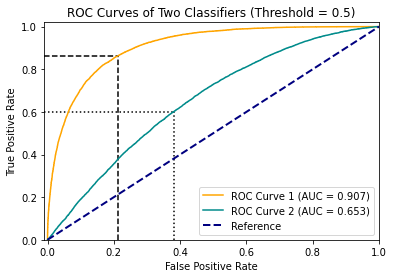

In [5]:
fig, ax = ROC_C1.Plot_ROC(xmin = -0.01, ymax = 1.02, Legend = 'ROC Curve 1')
ROC_C1.Add_Threshold_In_ROC(fig, ax)

ROC_C2.Add_ROC(fig, ax, Color = 'darkcyan', Legend = 'ROC Curve 2')
ROC_C2.Add_Threshold_In_ROC(fig, ax, Linestyle = 'dotted')

ROC_C1.Add_Plot_Details(fig, ax, Title = f'ROC Curves of Two Classifiers (Threshold = {Threshold})')

# Relationship among AUC, Mann–Whitney Statistics and Probability

## Simulation: Relationship between AUC and Mann–Whitney Statistics

No matter what classifier is, AUC has the same value as Mann–Whitney statistics.

In [6]:
from scipy.stats import rankdata                      # Using self-defined formula to calculate statistics

def Calculate_Mann_Whitney_Statistics(Pos_Score, Neg_Score):
    n1 = len(Pos_Score); n0 = len(Neg_Score)
    Score = np.append(Pos_Score, Neg_Score) 
    
    Rank = rankdata(Score, method = 'average')         # Tie -> Average of Rank
    Rank1 = Rank[0:n1]                                 # Rank of positive instances
    
    U1 = np.sum(Rank1) - n1 * (n1 + 1) / 2             # Auxiliary U1
    MW_Stat = U1 / (n1 * n0)                           # Mann–Whitney Statistics
    
    return MW_Stat

MW_Stat_1 = Calculate_Mann_Whitney_Statistics(Score11, Score10)
print('For classifier 1,')
print(f'\tthe value of Stat is {MW_Stat_1:0.5f} while')
print(f'\tthe value of AUC is {ROC_C1.AUC:0.5f}.')

MW_Stat_2 = Calculate_Mann_Whitney_Statistics(Score21, Score20)
print('\nFor classifier 2,')
print(f'\tthe value of Stat is {MW_Stat_2:0.5f} while')
print(f'\tthe value of AUC is {ROC_C2.AUC:0.5f}.')

For classifier 1,
	the value of Stat is 0.90742 while
	the value of AUC is 0.90742.

For classifier 2,
	the value of Stat is 0.65302 while
	the value of AUC is 0.65302.


The Mann-Whitney statistics provided by scipy is indeed $U_1$ in my [notation](#Efficient-Computation-and-Usage-of-Statistics). Dividing it by a scaling contant gives back $U$.

In [7]:
from scipy.stats import mannwhitneyu                   # Using scipy package to calculate statistics

Statistic_1, _ = mannwhitneyu(Score11, Score10, alternative = 'two-sided') 
if Statistic_1 / (n1 * n0) == MW_Stat_1:
    print('For classifier 1, using self-defined formula gives the same statistics as using scipy package.')

Statistic_2, _ = mannwhitneyu(Score21, Score20, alternative = 'two-sided') 
if Statistic_2 / (n1 * n0) == MW_Stat_2:
    print('For classifier 2, using self-defined formula gives the same statistics as using scipy package.')

For classifier 1, using self-defined formula gives the same statistics as using scipy package.
For classifier 2, using self-defined formula gives the same statistics as using scipy package.


## Simulation: Relationship between AUC and Probability

For simulation, the distributions $X_1\sim f_1$ and $X_0\sim f_0$ are known. Thus, two large samples, each with size $n$, can be generated. Denote the samples from $f_1$ and $f_0$ by $X_{11},\dots,X_{1n}$ and $X_{01},\dots,X_{0n}$ respectively. A theoretical probability $\mathbb{P}(X_1 > X_0) = \mathbb{E} [\mathbb{1}_{\mathbb{R}^+}(X_{1} - X_{0})]$ is estimated by
$$\hat{\mathbb{P}}(X_1 > X_0)=\frac{1}{n}\sum_{i=1}^n \mathbb{1}_{\mathbb{R}^+}(X_{1i} - X_{0i}),$$
where $\mathbb{1}_{\mathbb{R}^+}(\cdot)$ is the indicator function, i.e. $\mathbb{1}_{\mathbb{R}^+}(x) = 1$ if $x>0$, 0 otherwise. The empirical probability is slightly different from simulated AUC since the former is more accurate from large-sample approximation.

In [8]:
n = 1000000
print(f'The empirical probabilities are estimated from n = {n:,}.\n')

X11 = np.random.beta(a11, b11, n)           # Classifier 1
X10 = np.random.beta(a10, b10, n)
X21 = np.random.beta(a21, b21, n)           # Classifier 2
X20 = np.random.beta(a20, b20, n)

print(f'Considering Classifier 1, the empirical probability is {(X11 > X10).mean():0.5f} while the AUC is {ROC_C1.AUC:0.5f}.')
print(f'Considering Classifier 2, the empirical probability is {(X21 > X20).mean():0.5f} while the AUC is {ROC_C2.AUC:0.5f}.')

The empirical probabilities are estimated from n = 1,000,000.

Considering Classifier 1, the empirical probability is 0.90972 while the AUC is 0.90742.
Considering Classifier 2, the empirical probability is 0.64774 while the AUC is 0.65302.


# Reference
1. [Wikipedia: Mann–Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)
2. [Wikipedia: Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
3. [sklearn: Receiver operating characteristic](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
4. [scipy: beta random variable](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html)
5. [The Meaning and Use of the Area under a ROC Curve](https://www.researchgate.net/publication/16134792_The_Meaning_and_Use_of_the_Area_Under_a_Receiver_Operating_Characteristic_ROC_Curve) by Hanley and Mcneil in 1982 
6. [Areas beneath the ROC and ROL curves: Statistical significance and interpretation](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.458.8392) by Mason and Graham in 2002
7. [An introduction to ROC analysis](https://www.researchgate.net/publication/222511520_Introduction_to_ROC_analysis) by Fawcett in 2005
8. [Efficient AUC Optimization for Classification](https://www.researchgate.net/publication/220699504_Efficient_AUC_Optimization_for_Classification) by Calders and Jaroszewicz in 2007 